### Perform a Geographical analysis of the restaurants in the dataset

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
!pip install folium
import folium

Defaulting to user installation because normal site-packages is not writeable


In [18]:
df=pd.read_csv("restaurant data.csv")
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [20]:
grouped_by_city = df.groupby('City')

In [22]:
restaurant_count = grouped_by_city['Restaurant Name'].count()

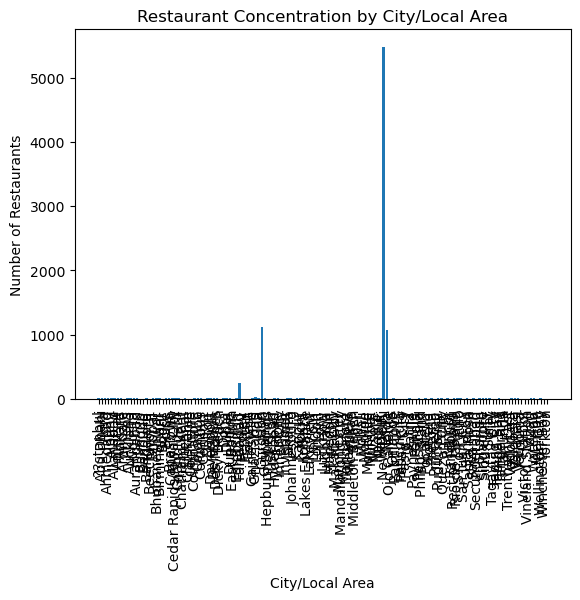

In [24]:
import matplotlib.pyplot as plt 
plt.bar(restaurant_count.index, restaurant_count.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Number of Restaurants') 
plt.title('Restaurant Concentration by City/Local Area') 
plt.xticks(rotation=90) 
plt.show()

In [28]:
from sklearn.cluster import KMeans 

X = df[['Latitude', 'Longitude']] 
k = 5 
kmeans = KMeans(n_clusters=k, random_state=0) 
cluster_labels = kmeans.fit_predict(X) 
df['Cluster'] = cluster_labels

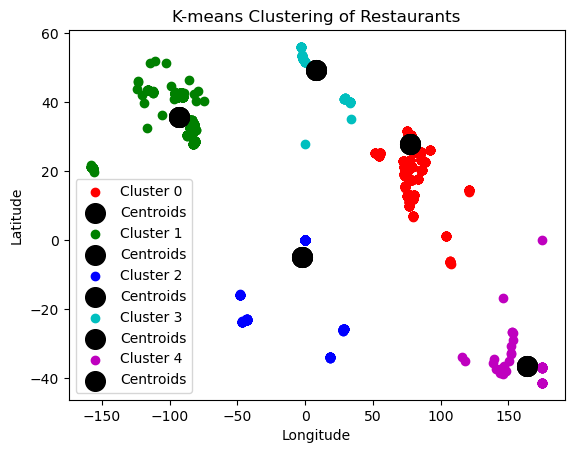

In [30]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] 

for cluster_num in range(k): 
    cluster_data = df[df['Cluster'] == cluster_num] 
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], 
                c=colors[cluster_num], label=f'Cluster {cluster_num}') 
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], 
                s=200, c='black', label='Centroids') 
    plt.xlabel('Longitude') 
    plt.ylabel('Latitude') 
    plt.title('K-means Clustering of Restaurants') 
    plt.legend() 
plt.show()

### Averaging Ratings by City/Locality

In [33]:
average_ratings_by_city = grouped_by_city['Aggregate rating'].mean() 
print(average_ratings_by_city)

City
??stanbul          4.292857
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
                     ...   
Waterloo           3.650000
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
Name: Aggregate rating, Length: 141, dtype: float64


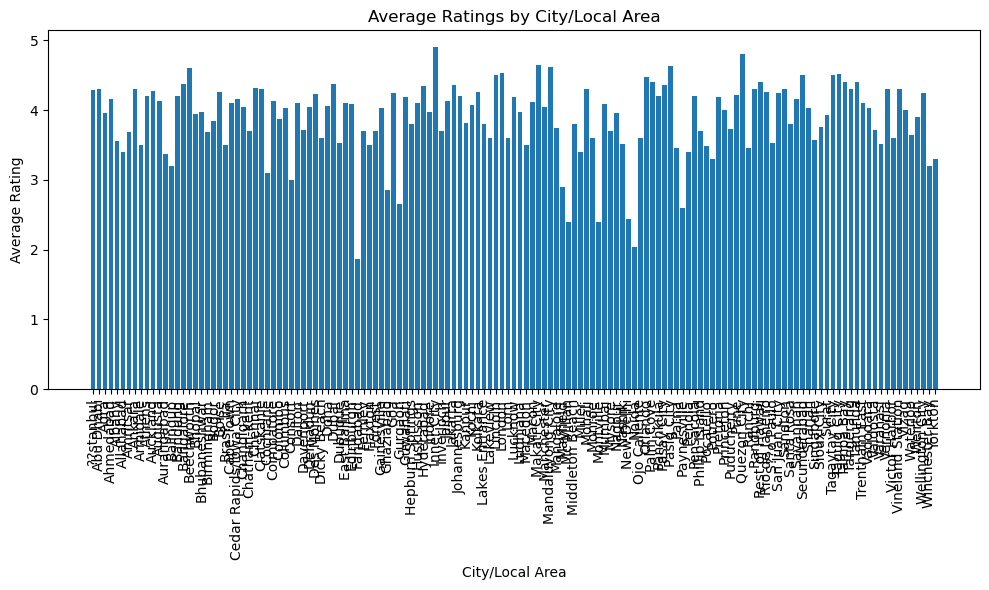

In [35]:
plt.figure(figsize=(10, 6)) 

plt.bar(average_ratings_by_city.index, average_ratings_by_city.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Average Rating') 
plt.title('Average Ratings by City/Local Area') 
plt.xticks(rotation=90) # Rotate x-axis labels for better readability 
plt.tight_layout() 
plt.show()

### Popular Cuisines by City/Locality

In [39]:
popular_cuisines_by_city = grouped_by_city['Cuisines'].agg(lambda x: x.mode().tolist()) 
print(popular_cuisines_by_city)

City
??stanbul                                                     [Cafe]
Abu Dhabi                         [American, Indian, Italian, Pizza]
Agra                                         [North Indian, Mughlai]
Ahmedabad          [Cafe, American, Continental, Armenian, Fast F...
Albany                                      [Japanese, Steak, Sushi]
                                         ...                        
Waterloo                                          [Chinese, Mexican]
Weirton                                    [Burger, Greek, Sandwich]
Wellington City                                               [Cafe]
Winchester Bay                              [Burger, Seafood, Steak]
Yorkton                                                      [Asian]
Name: Cuisines, Length: 141, dtype: object


C:\Users\sujit\AppData\Local\Temp\ipykernel_9480\3718216243.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


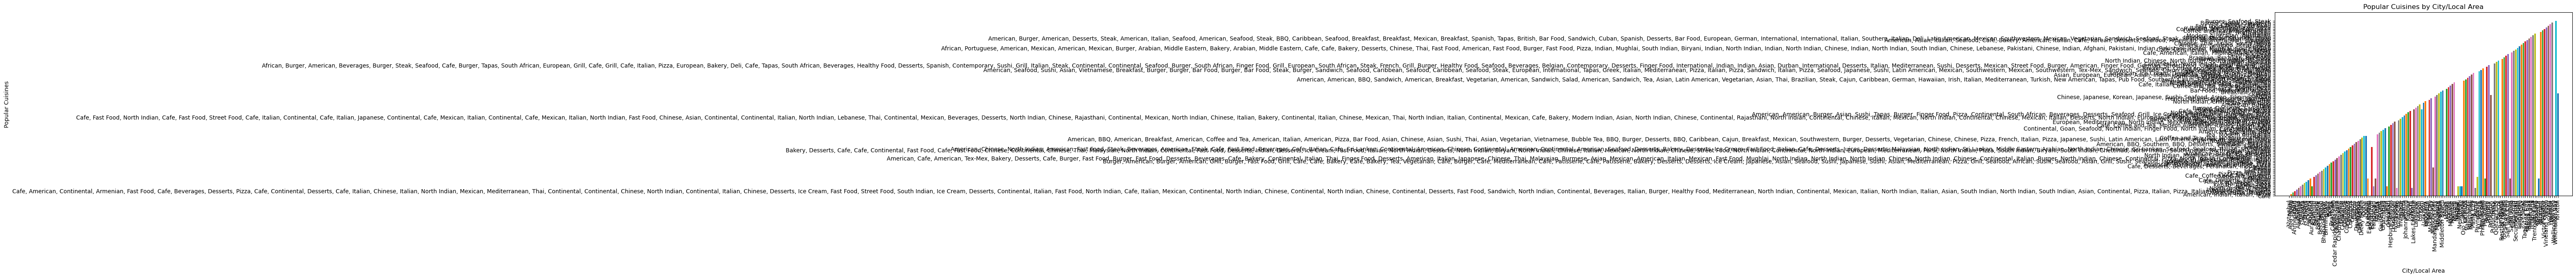

In [45]:
plt.figure(figsize=(10, 6)) 

for city, cuisines in popular_cuisines_by_city.items(): 
    plt.bar(city, ', '.join(cuisines)) 
    plt.xlabel('City/Local Area') 
    plt.ylabel('Popular Cuisines') 
    plt.title('Popular Cuisines by City/Local Area') 
    plt.xticks(rotation=90) # Rotate x-axis labels for better readability 
    plt.tight_layout()  
    
plt.show()

### Price Range Analysis by City/Locality

In [48]:
common_price_range_by_city = grouped_by_city['Price range'].agg(lambda x: x.mode().iloc[0]) 
print(common_price_range_by_city)

City
??stanbul          3
Abu Dhabi          4
Agra               2
Ahmedabad          3
Albany             1
                  ..
Waterloo           2
Weirton            2
Wellington City    4
Winchester Bay     2
Yorkton            2
Name: Price range, Length: 141, dtype: int64


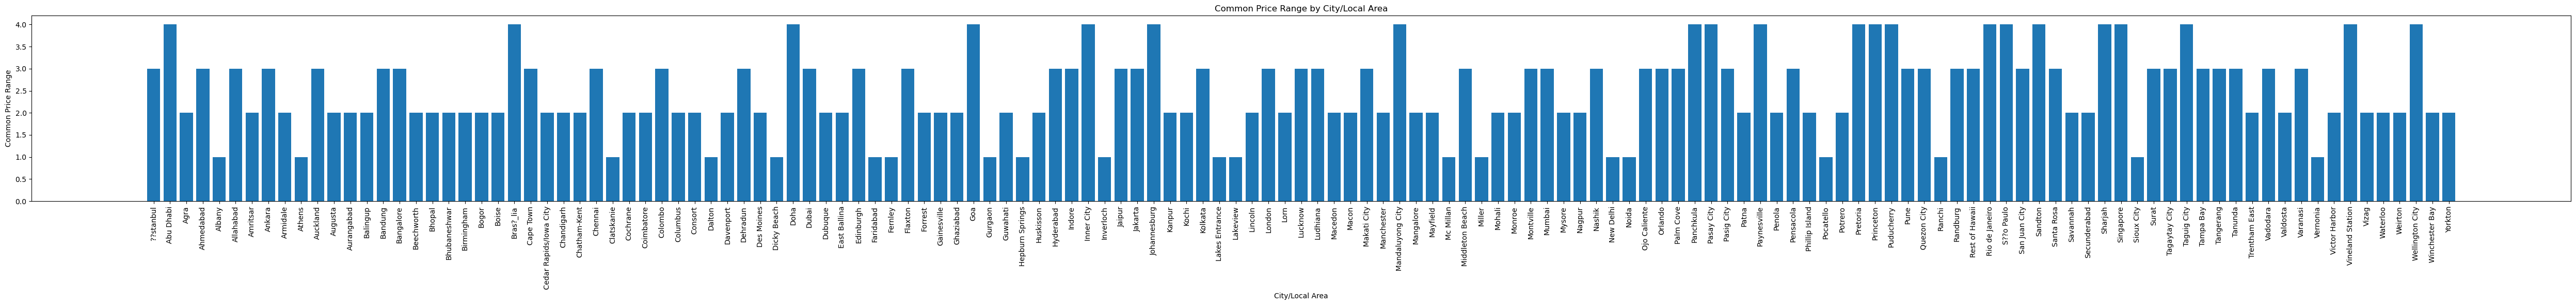

In [50]:
plt.figure(figsize=(50, 6)) 

plt.bar(common_price_range_by_city.index, common_price_range_by_city.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Common Price Range') 
plt.title('Common Price Range by City/Local Area') 
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

### Cuisine Diversity

In [53]:
grouped_by_city = df.groupby('City') 
cuisine_diversity = grouped_by_city['Cuisines'].apply(lambda x: len(set(x))) 
print(cuisine_diversity)

City
??stanbul          11
Abu Dhabi          17
Agra               15
Ahmedabad          21
Albany             17
                   ..
Waterloo           18
Weirton             1
Wellington City    17
Winchester Bay      1
Yorkton             1
Name: Cuisines, Length: 141, dtype: int64


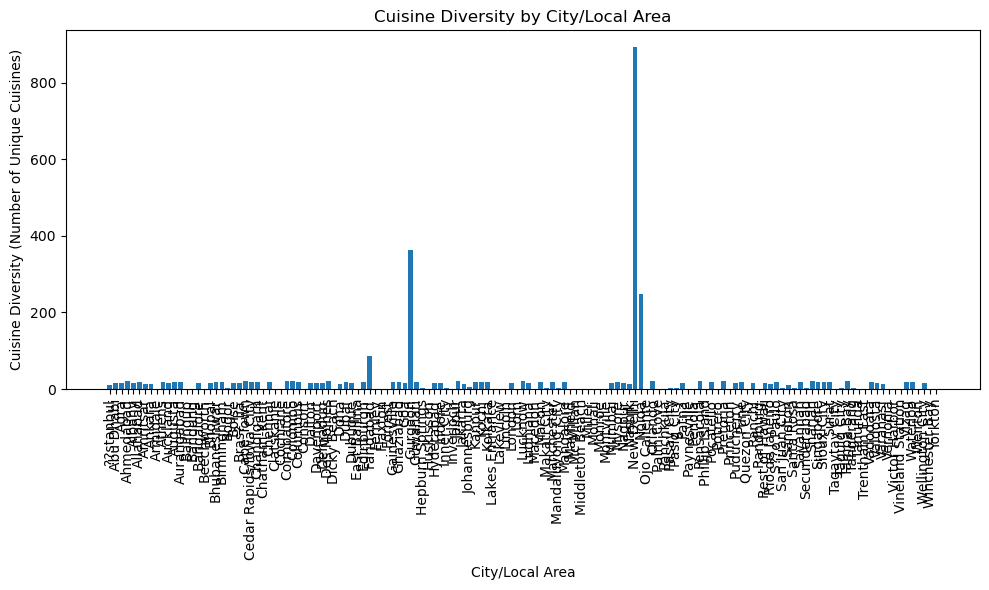

In [55]:
plt.figure(figsize=(10, 6)) 

plt.bar(cuisine_diversity.index, cuisine_diversity.values) 
plt.xlabel('City/Local Area') 
plt.ylabel('Cuisine Diversity (Number of Unique Cuisines)') 
plt.title('Cuisine Diversity by City/Local Area') 
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

### Conclusion